# First Order Equations

### 1.3 Constant Harvesting and Bifurcations

$\dfrac{dy}{dx} = -(y + 1)(y - 1)$

$\dfrac{dy}{dx} = -y^2$

$\dfrac{dy}{dx} = -y^2 - 1$

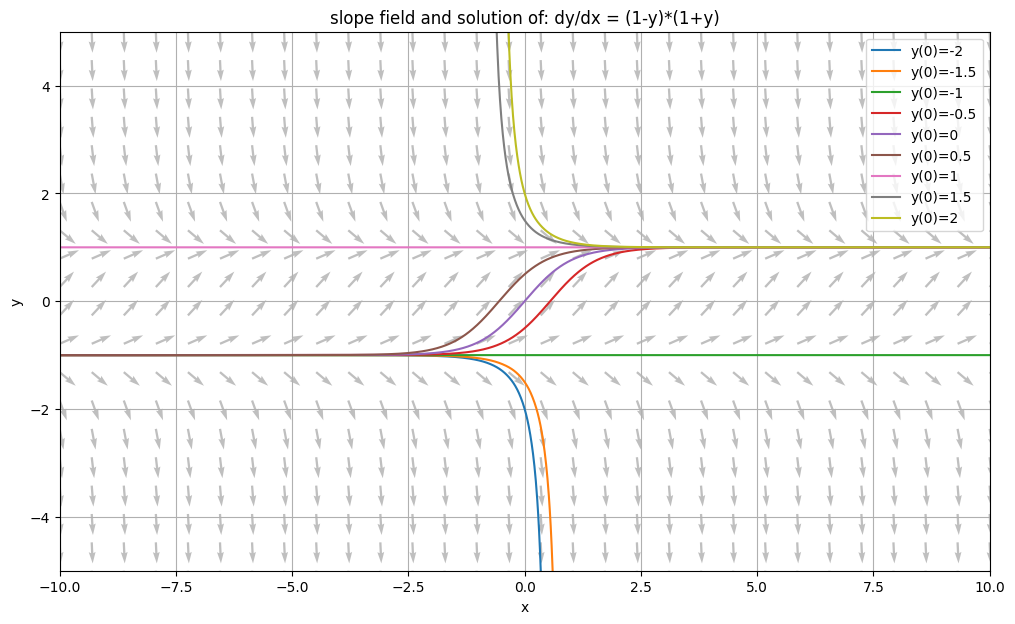

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dydx(x, y):
    return (1-y)*(1+y)

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-10, 10, 30)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = (1-y)*(1+y)")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx, [0, 10], [y0], t_eval=np.linspace(0, 10, 1000))
    sol_bwd = solve_ivp(dydx, [0, -10], [y0], t_eval=np.linspace(0, -10, 1000))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.show()


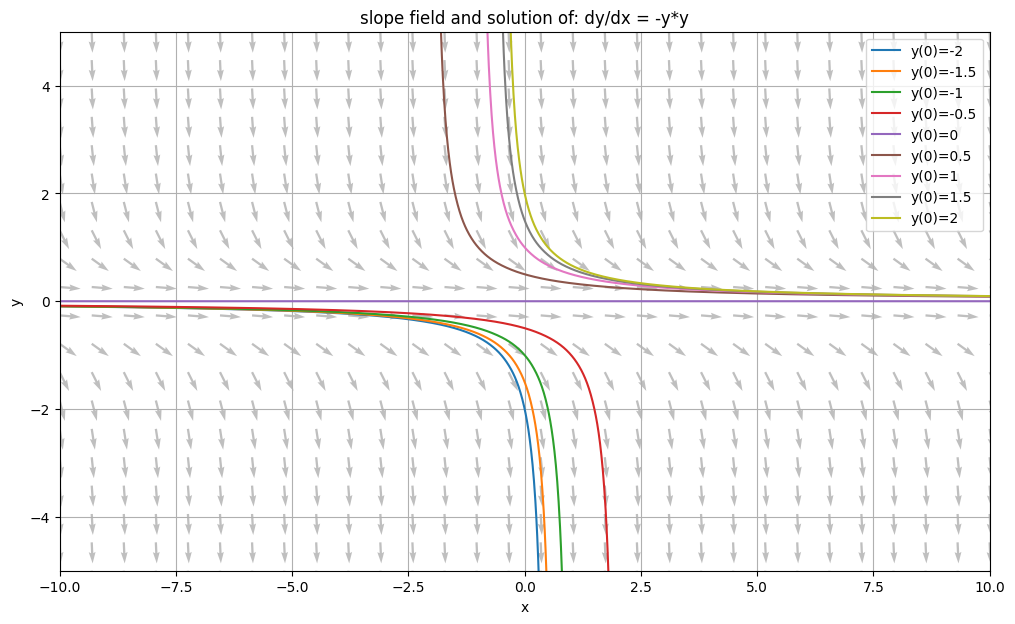

In [18]:
def dydx2(x, y):
    return -y*y

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-10, 10, 30)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx2(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = -y*y")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx2, [0, 10], [y0], t_eval=np.linspace(0, 10, 1000))
    sol_bwd = solve_ivp(dydx2, [0, -10], [y0], t_eval=np.linspace(0, -10, 1000))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.show()


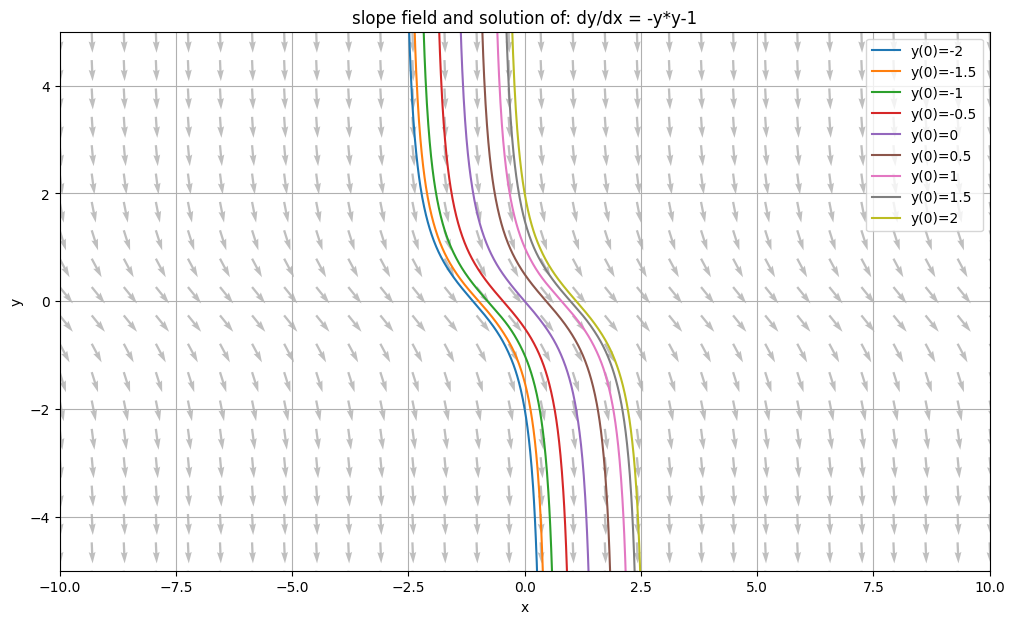

In [19]:
def dydx3(x, y):
    return -y*y - 1

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-10, 10, 30)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx3(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = -y*y-1")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx3, [0, 10], [y0], t_eval=np.linspace(0, 10, 1000))
    sol_bwd = solve_ivp(dydx3, [0, -10], [y0], t_eval=np.linspace(0, -10, 1000))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.show()


### 1.4 Periodic Harvesting and Periodic Solutions
$x' = f(t, x) = ax(1 - x) - h(1 + \sin(2\pi t))$

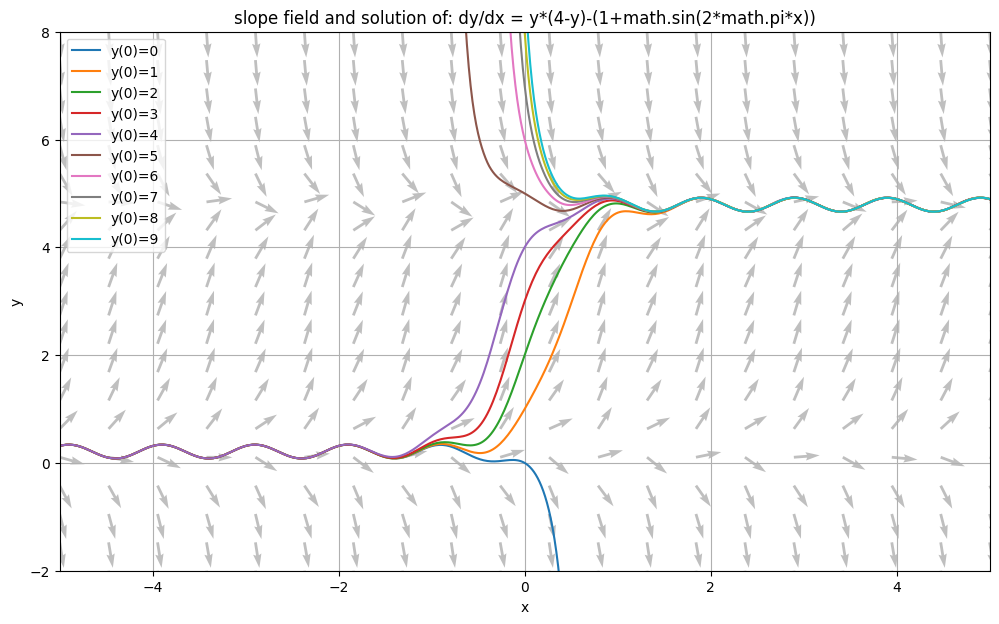

In [39]:
import math
def dydx4(x, y):
    return y*(5-y)-(1+np.sin(2*np.pi*x))

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-5, 5, 20)
y = np.linspace(-2, 8, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx4(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = y*(4-y)-(1+math.sin(2*math.pi*x))")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [0,1,2,3,4,5,6,7,8,9]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx4, [0, 10], [y0], t_eval=np.linspace(0, 10, 500))
    sol_bwd = solve_ivp(dydx4, [0, -10], [y0], t_eval=np.linspace(0, -10, 500))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-2, 8)
plt.show()